In [3]:
# a =  0.4420450177378683
# b = 0.010690629668597906
# c = 0.060119161083589945

a =  0.009642943936851278
b = 0.0002571122530929948
c = 0.4094753693994586

x = a + b + c + 1.0
w1 = a / x
w2 = (a + b) / x
w3 = (a + b + c) / x
w4 = 1.0
weights = [w1, w2, w3, w4]
print(weights)

[0.0067937937792934494, 0.006974938421125069, 0.29546476431015783, 1.0]


In [12]:
# assume you already have step_2_losses from your find_min_s2_loss logic
# e.g.:
import re

log_path = '/home/cherish/SADD/sfd-main/exps/00054-cifar10-4-3-dpmpp-3-poly7.0/log.txt'
all_losses = [[] for _ in range(3)]
pattern = re.compile(r"Step:\s*(\d+)\s*\|\s*Loss-mean:\s*([0-9]+\.[0-9]+)")
with open(log_path, 'r') as f:
    for line in f:
        m = pattern.search(line)
        if m:
            step = int(m.group(1))
            loss = float(m.group(2))
            if 0 <= step < 3:
                all_losses[step].append(loss)

step_2_losses = all_losses[2]

# now find the min and its iteration index
min_loss = min(step_2_losses)
min_iter = step_2_losses.index(min_loss)
print(f"Min Step-2 loss {min_loss:.6f} occurred at iteration index {min_iter}")

Min Step-2 loss 4.244495 occurred at iteration index 1133


In [10]:
find_min_s2_loss("/home/cherish/SADD/sfd-main/exps/00054-cifar10-4-3-dpmpp-3-poly7.0/log.txt")

1563


4.24449539

In [4]:
def find_min_s2_loss(log_path: str) -> float:
    """
    Parse the log file to extract all Step 2 Loss_ls-3-mean values
    and return their minimum.
    """
    
    step2_losses = []
    
    # Pattern to match Step 2 Loss_ls-3-mean lines
    step2_loss_pattern = re.compile(r"Step:\s*2\s*\|\s*Loss-mean:\s*([0-9]+\.[0-9]+)")

    
    with open(log_path, 'r') as f:
        for line in f:
            match = step2_loss_pattern.search(line)
            if match:
                loss_value = float(match.group(1))
                step2_losses.append(loss_value)
                # print(f"Found Step 2 Loss_ls-3-mean: {loss_value}")
    
    if not step2_losses:
        raise ValueError("No Step 2 Loss_ls-3-mean values found")
    
    min_loss = min(step2_losses)
    # print(f"\nAll Step 2 Loss_ls-3-mean values: {step2_ls3_losses}")
    # print(f"Total count: {len(step2_ls3_losses)}")
    # print(f"Minimum Step 2 Loss_ls-3-mean: {min_loss}")
    
    return min_loss

In [5]:
import re
find_min_s2_loss("/teamspace/studios/this_studio/sfd-main/training/original_training_logs.txt")

4.69043016

In [8]:
import pickle

pkl_path = '/teamspace/studios/this_studio/sfd-main/exps/teacher_model/edm-cifar10-32x32-cond-vp.pkl'  # replace with your .pkl file path
with open(pkl_path, 'rb') as f:
    data = pickle.load(f)

if hasattr(data, 'keys'):
    print("Keys in the pickle file:", list(data.keys()))
else:
    print(f"Loaded object is a {type(data)}, which has no .keys()")

Keys in the pickle file: ['ema', 'loss_fn', 'augment_pipe', 'dataset_kwargs']


In [ ]:
# Print the state_dict of the model inside the loaded pickle
state_dict = data['ema'].model.state_dict()
print("Model state_dict keys and tensor shapes:")
for name, tensor in state_dict.items():
    print(f"{name}: {tuple(tensor.shape)}")

In [1]:
import re
import matplotlib.pyplot as plt

def get_fid_values(file_path, prefix_id):
    """
    Extracts FID values from fid.txt for a given prefix_id (0 or 1).

    Args:
        file_path (str): Path to fid.txt
        prefix_id (int): 0 -> "00000", 1 -> "00001"

    Returns:
        list: Extracted FID values
    """
    prefix = f"{prefix_id:05d}"  # formats 0 -> "00000", 1 -> "00001"
    # pattern = re.compile(rf"{prefix}-cifar10-4-3-dpmpp-3-poly7\.0_netwrol_snapshot_\d+\s+([\d\.]+)")
    pattern = re.compile(rf"{prefix}-cifar10-4-\d-dpmpp-3-poly7\.0.*?_netwrol_snapshot_\d+\s+([\d\.]+)")

    values = []
    with open(file_path, "r") as f:
        
        for line in f:
            match = pattern.search(line)
            if match:
                values.append(float(match.group(1)))
    return values

# Example usage
file_path = "fid.txt"

values_00 = get_fid_values(file_path, 0)
values_11 = get_fid_values(file_path, 1)



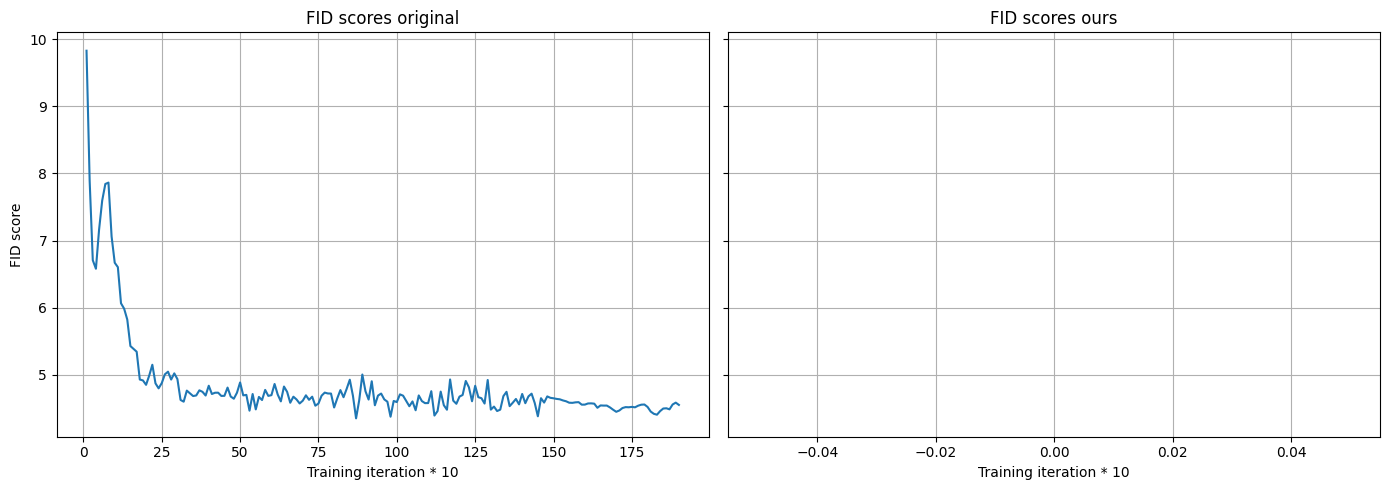

In [8]:
import matplotlib.pyplot as plt

values_0 = values_00[9:]
values_1 = values_11[10:]
# Generate x-axis as natural numbers
nums_0 = list(range(1, len(values_0) + 1))
nums_1 = list(range(1, len(values_1) + 1))

# Create subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot values_0
axes[0].plot(nums_0, values_0, linestyle='-')
axes[0].set_title("FID scores original")
axes[0].set_xlabel("Training iteration * 10")
axes[0].set_ylabel("FID score")
axes[0].grid(True)

# Plot values_1
axes[1].plot(nums_1, values_1, linestyle='-', color='orange')
axes[1].set_title("FID scores ours")
axes[1].set_xlabel("Training iteration * 10")
axes[1].grid(True)

# Adjust layout and show
plt.tight_layout()
plt.show()


ValueError: v cannot be empty

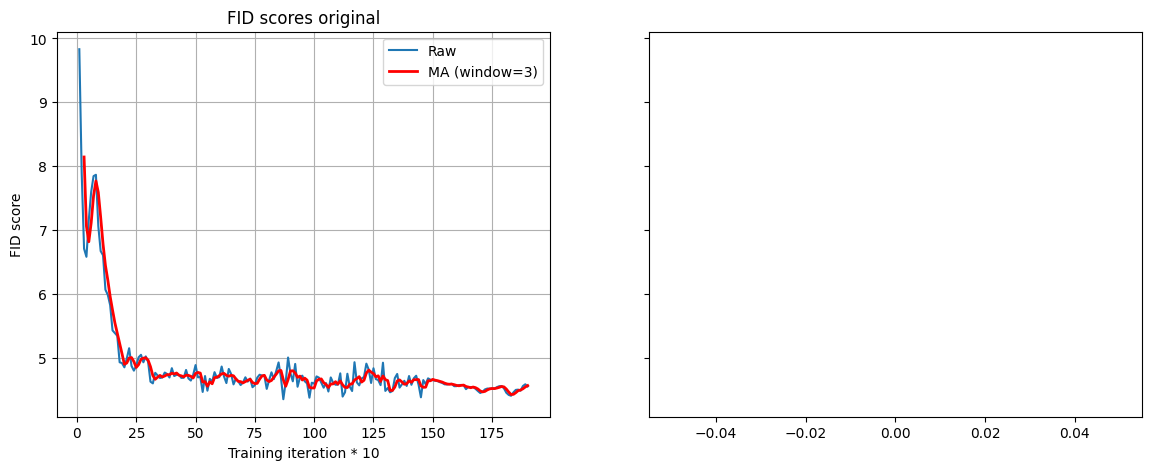

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
window_size = 3  # adjust for smoother/less smooth curve

# Function to compute moving average
def moving_average(values, window):
    return np.convolve(values, np.ones(window)/window, mode='valid')

values_0 = values_00[9:]
values_1 = values_11[10:]
nums_0 = list(range(1, len(values_0) + 1))
nums_1 = list(range(1, len(values_1) + 1))

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Plot values_0
axes[0].plot(nums_0, values_0, linestyle='-', label="Raw")
axes[0].plot(
    range(window_size, len(values_0)+1),
    moving_average(values_0, window_size),
    color="red", linewidth=2, label=f"MA (window={window_size})"
)
axes[0].set_title("FID scores original")
axes[0].set_xlabel("Training iteration * 10")
axes[0].set_ylabel("FID score")
axes[0].grid(True)
axes[0].legend()

# Plot values_1
axes[1].plot(nums_1, values_1, marker='o', linestyle='-', color='orange', label="Raw")
axes[1].plot(
    range(window_size, len(values_1)+1),
    moving_average(values_1, window_size),
    color="red", linewidth=2, label=f"MA (window={window_size})"
)
axes[1].set_title("FID scores ours")
axes[1].set_xlabel("Training iteration * 10")
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()
